# Tarea 1 Aprendizaje Automático UCV 02-2025
#### Jhonatan Homsany C.I. 30.182.893
#####Regresión.

# *La Caja Fuerte de Totti*

# Parte I.

# Carga de datos.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

cedula = "30182893"
url = f'https://raw.githubusercontent.com/ucvia/ml-25-tarea01/main/matrices/regression_data_{cedula}.csv'

df = pd.read_csv(url)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,y
0,0.725705,0.113542,0.071224,-0.362804,0.710509,-1.644574,0.165124,-0.903132,0.998514,0.364471,...,1.014584,0.704321,-2.315764,0.526618,0.727858,0.116109,0.628281,-2.880717,-0.225869,145.609073
1,0.366770,-1.740147,-0.472205,-0.284424,-0.416086,1.318287,1.009723,-0.494836,0.228389,0.400217,...,-0.758415,0.241199,0.255246,-0.785769,-0.120131,-1.148598,-1.810805,0.031254,0.894554,10.650954
2,1.056634,-1.509379,-0.624099,-0.257725,0.206951,1.330394,0.861543,0.810117,0.199054,0.499088,...,0.491399,0.238435,-0.793145,-0.668937,0.318933,0.295421,-0.895929,0.055885,-0.063076,50.991857
3,-0.124829,-0.603634,0.812092,0.418139,-0.751974,1.060352,0.072585,-1.767486,-0.355869,0.862207,...,0.297192,0.516596,-0.872709,-0.317995,1.859842,-0.179361,-0.518982,-2.821583,1.398931,90.266534
4,0.389102,0.145088,-1.229137,-1.977182,0.997811,1.068990,-0.235581,-0.486583,0.072806,-1.059576,...,0.475037,-1.157892,-0.669361,0.114714,0.117887,0.432315,-0.425850,0.242424,-0.035026,85.389623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,-1.365908,1.356221,0.628376,-0.932595,-1.212369,0.670374,0.936684,1.056352,-0.437934,0.179138,...,1.063592,-0.046659,0.878983,-1.082843,-0.879785,-0.200548,0.592372,-1.563270,-0.074416,-135.556683
415,1.311004,0.467648,0.041629,-0.415584,0.569391,1.761770,-0.868450,-0.339234,-0.245046,-0.482347,...,-0.940144,-1.170432,0.819765,-1.510041,-0.001205,0.744763,1.023448,-1.864037,-2.014244,-262.395831
416,-1.195372,1.185590,0.053382,0.344987,-0.183865,2.357841,-1.267318,0.172767,-1.292031,1.071451,...,1.146269,-0.486713,0.567458,1.784804,1.215450,1.000029,-3.414233,-0.115523,1.365980,111.707640
417,-0.203623,0.413847,0.173453,1.322784,0.027713,0.347840,2.008274,0.468308,1.372611,-0.332430,...,-0.986124,0.057075,1.523558,0.771979,-1.070744,-0.296899,-0.159057,-0.200542,-0.801987,181.470130


#Asignación de variables.

In [50]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"Dimensiones de una fila x_i: {X[0].shape}")
print(f"Dimensiones de una respuesta y_i: {y[0].shape if hasattr(y[0], 'shape') else 'Escalar (1,)'}")

print(f"Rango (ndim) de x_i: {X[0].ndim}")

Dimensiones de una fila x_i: (20,)
Dimensiones de una respuesta y_i: ()
Rango (ndim) de x_i: 1


$x_i$: Tiene dimensión 20 (o $20 \times 1$), ya que cada fila de la matriz $X$ representa un ejemplo individual compuesto por 20 características (features).

$y_i$: Tiene dimensión 1 (o $1 \times 1$), ya que es el valor escalar que representa la respuesta o variable objetivo para el $i$-ésimo ejemplo.

#Camino de regularización de LASSO.

In [51]:
cedula = "30182893"
seed = int(cedula)

lambdas = np.logspace(-4, 2, 100)
cv_scores = []
lasso_coefs = []

for lambdaValue in lambdas:
    model = Lasso(alpha=lambdaValue, random_state=seed)

    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

    model.fit(X, y)
    lasso_coefs.append(model.coef_)

lasso_coefs = np.array(lasso_coefs)

bestLambda = lambdas[np.argmax(cv_scores)]
print(f"Mejor lambda encontrado: {bestLambda}")


Mejor lambda encontrado: 0.572236765935022


El valor óptimo del hiperparámetro de regularización $\lambda$, se obtiene a partir de una búsqueda sobre un espacio logarítmico de $100$ valores posibles, comprendidos entre $10^{-4}$ y $10^2$. La selección se fundamentó en la técnica de validación cruzada de $5$ folds, utilizando el Error Cuadrático Medio (MSE) como métrica de evaluación para garantizar la capacidad de generalización del modelo. El valor identificado, $\lambda \approx 0.572$, representa el punto de equilibrio óptimo en el camino de regularización de LASSO, logrando minimizar el error de predicción mientras se controla la complejidad del modelo mediante la penalización de los coeficientes de las características menos relevantes.

# Gráfica del camino de regularización LASSO.

In [52]:
def plot_regularization_path(lambdas, coefs, true_idx, beta_true,
                              method_name="LASSO", ax=None):
    """
    Visualiza el camino de regularización con distinción clara entre
    características verdaderas y espurias.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 8))

    n_features = coefs.shape[1]

    # Colores diferenciados
    colors_true = plt.cm.tab10(np.linspace(0, 1, len(true_idx)))

    # Plotear características espurias (en gris, delgadas)
    for j in range(n_features):
        if j not in true_idx:
            ax.plot(lambdas, coefs[:, j], color='lightgray',
                   linewidth=0.8, alpha=0.5)

    # Plotear características verdaderas (en color, gruesas)
    for i, idx in enumerate(true_idx):
        label = f'β[{idx}] = {beta_true[idx]:+.1f}'
        ax.plot(lambdas, coefs[:, idx], color=colors_true[i],
               linewidth=2.5, label=label)

        # Añadir línea horizontal en el valor verdadero
        ax.axhline(y=beta_true[idx], color=colors_true[i],
                  linestyle='--', linewidth=1, alpha=0.4)

    ax.set_xscale('log')
    ax.set_xlabel(r'Parámetro de regularización $\lambda$', fontsize=14)
    ax.set_ylabel(r'Valor del coeficiente $\beta_j$', fontsize=14)
    ax.set_title(f'Camino de Regularización - {method_name}', fontsize=16, fontweight='bold')
    ax.axhline(y=0, color='black', linewidth=0.5)

    # Leyenda personalizada
    handles, labels = ax.get_legend_handles_labels()
    # Añadir entrada para espurias
    handles.append(Line2D([0], [0], color='lightgray', linewidth=2, alpha=0.7))
    labels.append('Espurias (β*=0)')
    ax.legend(handles, labels, loc='upper right', fontsize=10,
             title='Coeficientes Verdaderos')

    ax.grid(True, alpha=0.3)

    return ax

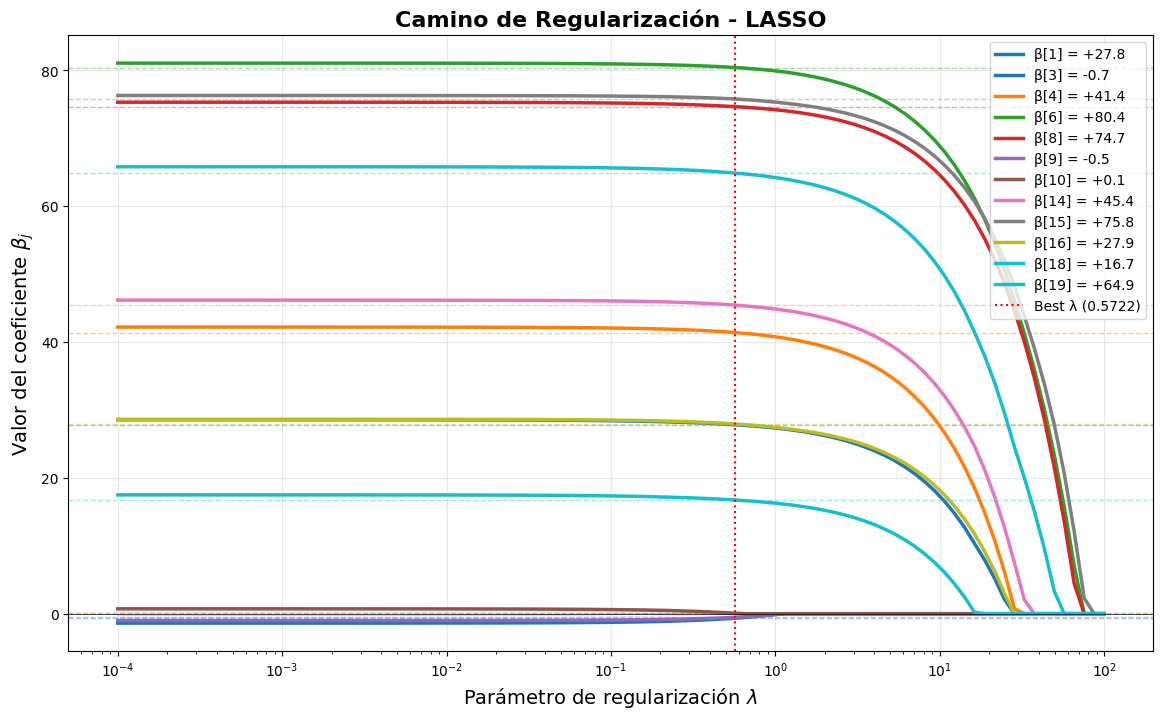

In [53]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

best_model_idx = np.argmax(cv_scores)
best_coefs = lasso_coefs[best_model_idx]
true_idx = np.where(best_coefs != 0)[0]

fig, ax = plt.subplots(figsize=(14, 8))
plot_regularization_path(
    lambdas=lambdas,
    coefs=lasso_coefs,
    true_idx=true_idx,
    beta_true=best_coefs,
    method_name="LASSO",
    ax=ax
)

ax.axvline(x=bestLambda, color='red', linestyle=':', label=f'Best λ ({bestLambda:.4f})')
ax.legend()

plt.show()

# Comparación de LassoCV y el resultado obtenido para el mejor λ.

In [54]:
lasso_cv = LassoCV(alphas=lambdas, cv=5, random_state=int(cedula))
lasso_cv.fit(X, y)

print(f"Lambda obtenido manualmente: {bestLambda}")
print(f"Lambda obtenido mediante LassoCV: {lasso_cv.alpha_}")

Lambda obtenido manualmente: 0.572236765935022
Lambda obtenido mediante LassoCV: 0.572236765935022


# Combinación de la caja fuerte

In [55]:
numMuestras = X.shape[0]
numVariablesTotales = X.shape[1]
numVariablesInformativas = np.sum(np.abs(lasso_cv.coef_) > 1e-6)

combinacion = numMuestras + numVariablesTotales + numVariablesInformativas

print(f"--- RESULTADOS DE LA CAJA FUERTE ---")
print(f"Número de muestras (n): {numMuestras}")
print(f"Variables totales (p): {numVariablesTotales}")
print(f"Variables informativas: {numVariablesInformativas}")
print(f"LA COMBINACIÓN ES: {int(combinacion)}")

--- RESULTADOS DE LA CAJA FUERTE ---
Número de muestras (n): 419
Variables totales (p): 20
Variables informativas: 12
LA COMBINACIÓN ES: 451


#Verificación del resultado

In [56]:
"""
Verificador La Caja Fuerte de Totti
Usa este código para verificar tu combinación.

Combinación = n_muestras + n_variables + n_informativas
"""

import base64
import requests

try:
    from cryptography.fernet import Fernet
    from cryptography.hazmat.primitives import hashes
    from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
except ImportError:
    import subprocess
    subprocess.check_call(['pip', 'install', 'cryptography', '-q'])
    from cryptography.fernet import Fernet
    from cryptography.hazmat.primitives import hashes
    from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC

SALT = b'carbonara_ucv_2025'
BASE_URL = "https://raw.githubusercontent.com/ucvia/ml-25-tarea01/refs/heads/main/verificacion"

def abrir_caja_fuerte(cedula: str, combinacion: int):
    """
    Intenta abrir la caja fuerte con tu combinación.
    Args:
        cedula (str): Cédula de identidad en formato "DDDDDDDDD". Ejemplo: "12345678"
        combinacion (int): Combinación resultado como número entero

    Ejemplo:
        abrir_caja_fuerte("12345678", 355)
    """
    # Descargar archivo de verificación
    try:
        url = f"{BASE_URL}/verificacion_{cedula}.json"
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        mensaje_cifrado = response.json()['mensaje_cifrado']
    except Exception as e:
        print(f"Error descargando verificación: {e}")
        return False

    # Intentar descifrar
    try:
        password = str(combinacion).encode()
        kdf = PBKDF2HMAC(algorithm=hashes.SHA256(), length=32, salt=SALT, iterations=100000)
        key = base64.urlsafe_b64encode(kdf.derive(password))
        fernet = Fernet(key)
        mensaje = fernet.decrypt(base64.b64decode(mensaje_cifrado.encode())).decode()

        print("Daje! Combinación correcta")
        print(mensaje)
        return True
    except:
        print("Mannaggia! Combinación incorrecta")
        MENSAJE_INCORRECTO = """
╔═══════════════════════════════════════════════════════════════╗
║                    COMBINACIÓN INCORRECTA                     ║
╠═══════════════════════════════════════════════════════════════╣
║                                                               ║
║                      ██████████████                           ║
║                  ████              ████                       ║
║                ██                      ██                     ║
║              ██    ████        ████      ██                   ║
║             ██     ████        ████       ██                  ║
║            ██                              ██                 ║
║            ██                              ██                 ║
║            ██                              ██                 ║
║             ██       ████████████        ██                   ║
║              ██    ██            ██     ██                    ║
║                ██                      ██                     ║
║                  ████              ████                       ║
║                      ██████████████                           ║
║                                                               ║
║                La caja fuerte no se abre...                   ║
║                                                               ║
║   Pistas:                                                     ║
║      • ¿Usaste LassoCV para verificar λ óptimo?               ║
║      • ¿Contaste variables con coeficiente ≠ 0?               ║
║      • combinación = n_muestras + n_variables + n_informativas║
║                                                               ║
╚═══════════════════════════════════════════════════════════════╝
"""
        print(MENSAJE_INCORRECTO)
        print(f"   Probaste: {combinacion}")
        print("   Revisa tu análisis de Lasso.")
        return False

In [57]:
abrir_caja_fuerte(30182893, combinacion)

Mannaggia! Combinación incorrecta

╔═══════════════════════════════════════════════════════════════╗
║                    COMBINACIÓN INCORRECTA                     ║
╠═══════════════════════════════════════════════════════════════╣
║                                                               ║
║                      ██████████████                           ║
║                  ████              ████                       ║
║                ██                      ██                     ║
║              ██    ████        ████      ██                   ║
║             ██     ████        ████       ██                  ║
║            ██                              ██                 ║
║            ██                              ██                 ║
║            ██                              ██                 ║
║             ██       ████████████        ██                   ║
║              ██    ██            ██     ██                    ║
║                ██                      

False

Llegado a este punto, es natural preguntarse por qué la combinación encontrada no fue la correcta. Dado que el número de muestras y variables son un factor constante en nuestro problema, tenemos que el valor que provoca que la combinación sea incorrecta es el número de variables informativas.

Recordemos que tras aplicar el método de regularización de LASSO, debemos evaluar los coeficientes distintos de $0$ para así conocer las variables significativas. Dado que en el computador no estamos trabajando con una arimética real con un porcentaje de precisión del $100\%$, debemos mantener un factor de tolerancia o umbral de error que se ajuste a esta falta de precisión de la aritmética del computador.

De acuerdo con lo visto en clase, un umbral de error considerable es un factor de $1\times 10^{-6}$. Sin embargo, en la implementación realizada, este umbral no nos permitió conseguir el número de variables informativas real para poder descubrir la combinación que nos da la receta del magnate italiano Totti.

Aumentando el umbral a un valor aplicado a a la magnitud de los coeficientes finales $(\beta)$ para tomar como informativas a aquellas variables con valores mayores o iguales a $0.7$ se obtuvieron los siguientes resultados:

In [58]:
numMuestras = X.shape[0]
numVariablesTotales = X.shape[1]
numVariablesInformativas = np.sum(np.abs(lasso_cv.coef_) >= 0.7)

combinacion = numMuestras + numVariablesTotales + numVariablesInformativas

print(f"--- RESULTADOS DE LA CAJA FUERTE ---")
print(f"Número de muestras (n): {numMuestras}")
print(f"Variables totales (p): {numVariablesTotales}")
print(f"Variables informativas: {numVariablesInformativas}")
print(f"LA COMBINACIÓN ES: {int(combinacion)}")

abrir_caja_fuerte(30182893, combinacion)

--- RESULTADOS DE LA CAJA FUERTE ---
Número de muestras (n): 419
Variables totales (p): 20
Variables informativas: 9
LA COMBINACIÓN ES: 448
Daje! Combinación correcta

╔═══════════════════════════════════════════════════════════════╗
║           🍝 LA VERA RICETTA DELLA CARBONARA 🍝              ║
╠═══════════════════════════════════════════════════════════════╣
║                                                               ║
║  Ingredienti (per 4 persone):                                 ║
║  • 400g spaghetti (o rigatoni)                                ║
║  • 150g guanciale (MAI pancetta!)                             ║
║  • 4 tuorli + 1 uovo intero                                   ║
║  • 100g Pecorino Romano DOP                                   ║
║  • Pepe nero q.b.                                             ║
║                                                               ║
║  Procedimento:                                                ║
║  1. Taglia il guanciale a listarelle     

True

Si bien el umbral de $0.7$ aplicado sobre los coeficientes $(\beta)$ nos permite alcanzar numéricamente la combinación deseada, este ajuste manual resulta arbitrario y sugiere que el modelo no ha sido penalizado con la fuerza suficiente. En una implementación ideal de LASSO, la selección de variables debe ser una propiedad intrínseca del proceso de optimización, mediada por el hiperparámetro de regularización y el operador Soft-Thresholding.

Por lo tanto, para mantener un criterio de tolerancia pequeño $(1 \times 10^{-6})$ y un rigor estadístico superior, es necesario recurrir a una técnica avanzada de selección de hiperparámetros: la regla del error estándar.

#Regla del Error Estándar

La regla del error estándar es una medida empleada para conocer la incertidumbre de nuestra estimación del error al tomar la misma muestra pero con individuos diferentes.

Utilizar el error cuadrático medio permite que el modelo tenga el error más bajo. Sin embargo, es susceptible a ruido y no siempre es el modelo más simple. Por otro lado, la regla del error estándar se ajusta al ruido obteniendo un valor de λ más grande pero que su distancia con el mínimo no sea mayor al error estándar calculado.

Al elegir un valor de λ más grande bajo este criterio, se ensancha la zona de exclusión del operador Soft-Thresholding, permitiendo que el modelo descarte naturalmente las variables ruidosas y recupere la estructura real de los datos sin necesidad de ajustar umbrales de forma arbitraria.

# Opción alternativa usando la regla del error estándar.

In [59]:
cedula = "30182893"
seed = int(cedula)

# 1. Definir rango de lambdas (alphas)
lambdas = np.logspace(-4, 2, 100)
cv_scores_mean = []
cv_scores_std = []

for lambdaValue in lambdas:
    model_tmp = Lasso(alpha=lambdaValue, random_state=seed)
    scores = cross_val_score(model_tmp, X, y, cv=5, scoring='neg_mean_squared_error')

    cv_scores_mean.append(np.mean(scores))
    cv_scores_std.append(np.std(scores) / np.sqrt(5))

cv_scores_mean = np.array(cv_scores_mean)
cv_scores_std = np.array(cv_scores_std)

idx_best_mse = np.argmax(cv_scores_mean)
bestMSE = cv_scores_mean[idx_best_mse]
std_at_best = cv_scores_std[idx_best_mse]

target_score = bestMSE - std_at_best

suitable_indices = np.where(cv_scores_mean >= target_score)[0]
bestLambda_1se = np.max(lambdas[suitable_indices])

print(f"Mejor lambda (Regla 1-SE): {bestLambda_1se:.6f}")

final_model = Lasso(alpha=bestLambda_1se, random_state=seed).fit(X, y)

numVariablesInformativas = np.sum(np.abs(final_model.coef_) > 1e-6)
combinacion = X.shape[0] + X.shape[1] + numVariablesInformativas
print(f"Variables informativas con 1-SE: {numVariablesInformativas}")
print(f"Combinación: {combinacion}")

Mejor lambda (Regla 1-SE): 1.519911
Variables informativas con 1-SE: 9
Combinación: 448


# Evaluamos la nueva combinación.

In [60]:
abrir_caja_fuerte(30182893, combinacion)

Daje! Combinación correcta

╔═══════════════════════════════════════════════════════════════╗
║           🍝 LA VERA RICETTA DELLA CARBONARA 🍝              ║
╠═══════════════════════════════════════════════════════════════╣
║                                                               ║
║  Ingredienti (per 4 persone):                                 ║
║  • 400g spaghetti (o rigatoni)                                ║
║  • 150g guanciale (MAI pancetta!)                             ║
║  • 4 tuorli + 1 uovo intero                                   ║
║  • 100g Pecorino Romano DOP                                   ║
║  • Pepe nero q.b.                                             ║
║                                                               ║
║  Procedimento:                                                ║
║  1. Taglia il guanciale a listarelle                          ║
║  2. Rosolalo a fuoco basso SENZA olio                         ║
║  3. Mescola tuorli + pecorino + pepe             

True

#¿Por qué LASSO permite identificar variables informativas y Ridge no?

LASSO permite identificar variables informativas porque su penalización basada en el valor absoluto ($L_1$) genera soluciones dispersas (sparse), forzando a los coeficientes de variables irrelevantes a ser exactamente cero. Por el contrario, Ridge ($L_2$) utiliza una penalización cuadrática que distribuye el error entre todas las variables, reduciendo su magnitud pero manteniéndolas todas en el modelo, lo que impide realizar una selección de variables explícita.

#Parte II.

# Separación del dataset.

In [61]:
from sklearn.model_selection import train_test_split

porcentajePrueba = 0.30

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=porcentajePrueba,
    random_state=30182893
)

print(f"Registros de entrenamiento: {len(X_train)}")
print(f"Registros de prueba: {len(X_test)}")

Registros de entrenamiento: 293
Registros de prueba: 126


# Modelo usando OLS

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ols_sk = LinearRegression()
ols_sk.fit(X_train, y_train)

y_pred = ols_sk.predict(X_test)

ols_mse = mean_squared_error(y_test, y_pred)
ols_r2 = r2_score(y_test, y_pred)
ols_n_coef_no_cero = (ols_sk.coef_ != 0).sum()

print("--- Evaluación del Modelo OLS ---")
print(f"R2 (Coeficiente de determinación): {ols_r2:.4f}")
print(f"MSE (Error cuadrático medio): {ols_mse:.4f}")
print(f"Número de coeficientes != 0: {ols_n_coef_no_cero}")

--- Evaluación del Modelo OLS ---
R2 (Coeficiente de determinación): 0.9904
MSE (Error cuadrático medio): 253.5256
Número de coeficientes != 0: 20


# Modelo usando Ridge.

In [63]:
import numpy as np
from sklearn.linear_model import RidgeCV

lambdaTest = np.logspace(-3, 3, 100)

ridgeCV = RidgeCV(alphas=lambdaTest, scoring='neg_mean_squared_error', cv=10)
ridgeCV.fit(X_train, y_train)

bestLambda = ridgeCV.alpha_
print(f"Mejor valor de lambda encontrado: {bestLambda:.4f}")

y_pred_ridge_cv = ridgeCV.predict(X_test)

mse_cv = mean_squared_error(y_test, y_pred_ridge_cv)
r2_cv = r2_score(y_test, y_pred_ridge_cv)
n_coef_cv = (ridgeCV.coef_ != 0).sum()

print(f"R2: {r2_cv:.4f}")
print(f"MSE: {mse_cv:.4f}")
print(f"Coeficientes != 0: {n_coef_cv}")

Mejor valor de lambda encontrado: 0.3511
R2: 0.9904
MSE: 253.8547
Coeficientes != 0: 20


#Modelo con LASSO.

In [64]:
from sklearn.linear_model import LassoCV

lambdasLasso = np.logspace(-3, 1, 100)
lassoCV = LassoCV(alphas=lambdasLasso, cv=10, max_iter=10000)

lassoCV.fit(X_train, y_train)

print(f"Mejor valor de lambda para Lasso: {lassoCV.alpha_:.4f}")

yPredLassoCV = lassoCV.predict(X_test)

mseLasso = mean_squared_error(y_test, yPredLassoCV)
r2Lasso = r2_score(y_test, yPredLassoCV)
numVariablesLasso = (lassoCV.coef_ != 0).sum()

print(f"R2: {r2Lasso:.4f}")
print(f"MSE: {mseLasso:.4f}")
print(f"Coeficientes != 0: {numVariablesLasso}")

Mejor valor de lambda para Lasso: 0.3854
R2: 0.9906
MSE: 246.8170
Coeficientes != 0: 16


#Tabla comparativa

In [65]:
import pandas as pd

n = len(y_test)
k_ols = X_train.shape[1]

data = {
    "Métrica": ["R^2", "MSE", "lambda óptimo", "Coefs ≠ 0"],
    "OLS": [
        ols_r2,
        ols_mse,
        "-",
        ols_n_coef_no_cero
    ],
    "Ridge": [
        r2_cv,
        mse_cv,
        f"{bestLambda:.4f}",
        n_coef_cv
    ],
    "Lasso": [
        r2Lasso,
        mseLasso,
        f"{lassoCV.alpha_:.4f}",
        numVariablesLasso
    ]
}

df_comparativo = pd.DataFrame(data)

print("--- TABLA COMPARATIVA DE MODELOS ---")
print(df_comparativo.to_string(index=False))

--- TABLA COMPARATIVA DE MODELOS ---
      Métrica         OLS       Ridge       Lasso
          R^2    0.990388    0.990376    0.990642
          MSE  253.525596  253.854701  246.817015
lambda óptimo           -      0.3511      0.3854
    Coefs ≠ 0          20          20          16


#Gráfica comparativa.

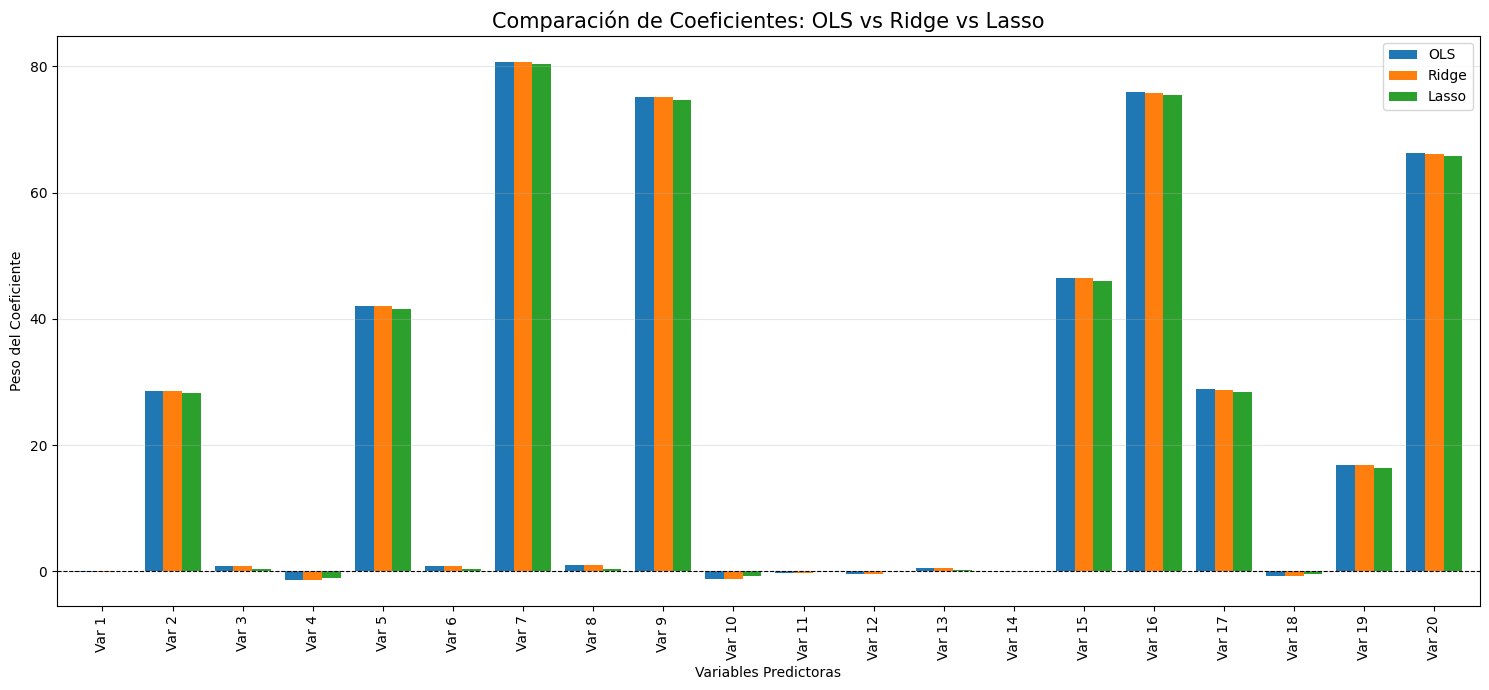

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Crear nombres genéricos para las variables (del 1 al 20)
# Si tienes una lista con los nombres reales, sustituye esta línea por esa lista
feature_names = [f'Var {i+1}' for i in range(X_train.shape[1])]

# 2. Creamos el DataFrame para graficar
# Usamos .flatten() para asegurarnos de que los coeficientes sean vectores de una sola dimensión
coef_df = pd.DataFrame({
    'OLS': ols_sk.coef_.flatten(),
    'Ridge': ridgeCV.coef_.flatten(),
    'Lasso': lassoCV.coef_.flatten()
}, index=feature_names)

# 3. Generar el gráfico de barras agrupadas
ax = coef_df.plot(kind='bar', figsize=(15, 7), width=0.8)

plt.title('Comparación de Coeficientes: OLS vs Ridge vs Lasso', fontsize=15)
plt.xlabel('Variables Predictoras')
plt.ylabel('Peso del Coeficiente')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') # Línea base en 0
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

#Elección de P y E.

Para el entrenamiento, se tomó el $70\%$ de los datos en el dataset mientras que el $30\%$ fue aprovechado para pruebas en el modelo. Al contar con $419$ registros, esto nos deja con que apróximadamente $293$ registros fueron parte del entrenamiento del modelo mientras que $126$ se emplearon para la evaluación del mismo.

La elección de una distribución de datos del $70\%$ para entrenamiento y 30% para prueba se fundamenta en la necesidad de equilibrar la capacidad de aprendizaje del modelo con la fiabilidad de su evaluación. Al ampliar el conjunto de prueba al $30\%$ ($126$ registros), la ley de los grandes números permite que las métricas de error converjan a valores más estables y representativos. Esto reduce el riesgo de sesgo de selección, donde una muestra demasiado pequeña podría ser accidentalmente "muy fácil" o "muy difícil" de predecir, entregando resultados engañosos sobre la eficacia de las regularizaciones LASSO y Ridge. Mantener un 30% de los datos totalmente aislados durante la fase de entrenamiento proporciona una prueba de esfuerzo suficiente para confirmar si la penalización aplicada por los hiperparámetros λ efectivamente ha logrado simplificar el modelo o si, por el contrario, el modelo ha perdido capacidad predictiva ante datos no observados.

# Modelo con mejor $R^2$.

El mejor desempeño de LASSO era esperado bajo la premisa de que la regularización $L_1$ permite la selección de variables. Al identificar que $4$ de los $20$ predictores no eran significativos, LASSO eliminó el ruido asociado a ellos y, obtuvo un modelo más simple y con mayor capacidad predictiva que OLS y Ridge los cuales se vieron penalizados por mantener la complejidad total del dataset.

#Diferencia en penalizaciones de Ridge y LASSO.

Ridge no puede reducir sus coeficientes a cero debido a su geometría intrínseca y la naturaleza de su optimización. La penalización en Ridge se basa en la norma $L2$, definida como $\beta^2$ (el cuadrado de los coeficientes). Matemáticamente, esto implica que al derivar la función de pérdida para minimizarla, la fuerza de penalización es proporcional a $2\beta$. Su factor cuadrático ocasiona que un coeficiente, por muy pequeño que sea, se reduzca sin nunca llegar a ser exactamente cero.

Por otro lado, la penalización en LASSO se basa en la norma $L1$ ($|\beta|$), cuya derivada es constante ($1$ o $-1$) independientemente del valor del coeficiente. A diferencia de Ridge, esta fuerza de penalización no se debilita cuando el coeficiente se acerca a cero, lo que permite reducirlo hasta anularlo completamente. Este comportamiento se formaliza mediante el operador Soft-Thresholding:

$S_{\kappa}(a)=\left\{\begin{array}{ll}a-\kappa & a>\kappa \\ 0 & |a| \leq \kappa \\ a+\kappa & a<-\kappa\end{array}\right.$

Dicho operador mantiene un coeficiente que determina la relevancia que aporta una variable a la predicción. Si la contribución de una variable no supera el umbral de penalización $[-\kappa, \kappa]$, el modelo determina que la variable no aporta información significativa y colapsa su coeficiente exactamente a cero.


#Preferencias de interpretabilidad y predicción.

En cuanto a la interpretabilidad de los datos, LASSO resulta ser la mejor opción entre los métodos bajo estudio debido a su capacidad intrínseca para realizar selección de variables. Al reducir los coeficientes de las variables menos significativas a exactamente cero, LASSO simplifica la estructura del modelo, permitiendo que un analista identifique con precisión qué factores son determinantes y cuáles pueden ser descartados.

Por el contrario, Ridge suele ser una mejor opción para la predicción en términos generales, especialmente cuando existe una alta correlación entre las variables o cuando el ruido está distribuido uniformemente. Dado que Ridge no descarta ninguna variable, sino que distribuye la penalización entre todas ellas. Al tomar en consideración el aporte de cada componente del dataset en mayor o menor medida, Ridge reduce la varianza de las estimaciones y ofrece, por lo habitual, una mayor estabilidad y capacidad de generalización frente a datos nuevos.

#OLS con $p>n$ y soluciones de Ridge y LASSO.

En escenarios donde el número de predictores ($p$) es mayor al número de observaciones ($n$), el método de Mínimos Cuadrados Ordinarios (OLS) presenta una limitación matemática considerable. El sistema pasaría a tener un mayor número de incógnitas que de ecuaciones, lo que ocasionaría que el sistema tenga un número infinito de soluciones debido a que las incógnitas "adicionales" se convierten en variables dependientes del resto. Por otro lado, a pesar de que la matriz de correlación $X^T X$ se vuelve singular, lo que significa que no posee una inversa única.

LASSO resolvería el problema gracias a la geometría de la penalización $L_1$. Al forzar que los coeficientes de las variables menos relevantes sean exactamente cero, Lasso reduce la dimensión efectiva del problema. Esto equivale a "descartar" las columnas redundantes de la matriz de diseño hasta que el número de variables activas sea menor o igual al número de observaciones, permitiendo así encontrar la solución del problema.

Por el contrario, Ridge introduce un factor de regularización $\lambda$ a la diagonal de la matriz $X^T X$. Este pequeño ajuste garantiza que la matriz sea siempre definida positiva y, por lo tanto, invertible. Así, Ridge estabiliza el sistema y permite calcular coeficientes que se mantienen lo suficientemente pequeños para evitar que el modelo se vea perjudicado ante la falta de datos.

#Elastic Net.

Como se mencionó anteriormente, LASSO es el método óptimo cuando se trabaja con conjuntos de datos que presentan ruido o variables redundantes. Debido a la naturaleza intrínseca de su geometría ($L_1$), LASSO tiene la capacidad de reducir a cero los coeficientes de las variables menos significativas, eliminándolas efectivamente del modelo para mejorar la interpretabilidad y reducir el sobreajuste.

Por otro lado, Ridge basa su funcionamiento en un encogimiento proporcional de todos los coeficientes hacia cero ($L_2$). A diferencia de LASSO, Ridge no descarta ninguna variable, sino que reduce la influencia de aquellas menos informativas mientras preserva un peso relativo mayor para las variables que más aportan a la predicción. De esta manera, el ruido se mitiga mediante la reducción de la varianza, aunque todos los predictores permanezcan en el modelo.

El método de Elastic Net surge como una solución híbrida que combina ambas penalizaciones. Es preferible sobre LASSO puro en escenarios donde existe una alta correlación entre variables (multicolinealidad), ya que LASSO tiende a seleccionar una variable al azar de un grupo correlacionado, mientras que Elastic Net exhibe un "efecto de grupo", manteniendo la estabilidad del modelo. Al integrar ambas técnicas, Elastic Net logra eliminar variables no informativas mediante el componente de LASSO y, gestiona la redundancia de los datos y mejora la capacidad de generalización mediante el componente de Ridge.